In [1]:
# Import math and statistics libraries
import numpy as np

# Import data manipulation libraries
import pandas as pd

# Import graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import system libraries
import os
import sys
from dotenv import load_dotenv

# # Import Polygon.io client for financial data
# from polygon import RESTClient

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from os_lib import OSLib # type: ignore
# from polygon_api import PolygonAPI

In [2]:
# Get the API key from environment variables
load_dotenv()
api_key = os.getenv('POLYGON_API_KEY')

In [3]:
# Tickers from a selection of the S&P 500 companies
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'IBM', 'AMZN', 'NVDA',
    'XOM', 'CVX', 'WMT', 'MMM', 'ARE', 'ALLE', 'JPM',
    'V', 'MA', 'PEP', 'CSCO', 'BA', 'ADBE', 'CAT', 
    'BLK', 'INTC', 'NKE', 'MDLZ'
]

In [4]:
indices = [
    'I:NDX', 'I:COMP',
    # 'I:SPX', 'I:DJI'
]

In [5]:
# Import custom lib
oslib = OSLib

# Get the root path of the repository
repo_path = oslib.get_root_path()

In [211]:
# Get the latest available data for intraday prices

source_path = repo_path + "/data/polygon/"
intraday_path = source_path + "intraday/mdlz/"

os.listdir(intraday_path)[-1].split('.')[0].split('_')[2:5]

['2025', '06', '23']

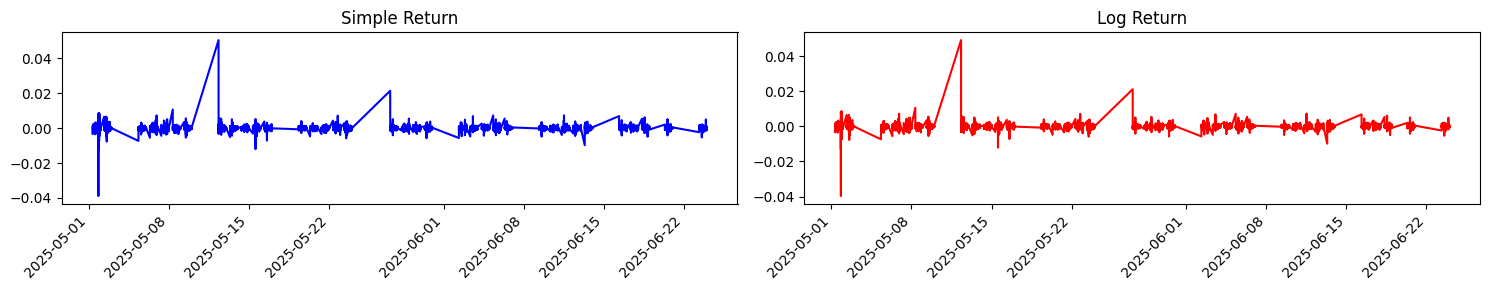

Simple Return: 0.00039 %
Log Return: 0.00035 %


In [212]:
source_path = repo_path + "/data/polygon/intraday/amzn/"

amzn = pd.read_parquet(source_path)
amzn.sort_index(inplace=True)

amzn['simple_return'] = (amzn['close'] / amzn['close'].shift(1)) - 1
amzn['log_return'] = np.log(amzn['close'] / amzn['close'].shift(1))

fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
amzn['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
amzn['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(amzn['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(amzn['log_return'].mean() * 100, 5)} %")

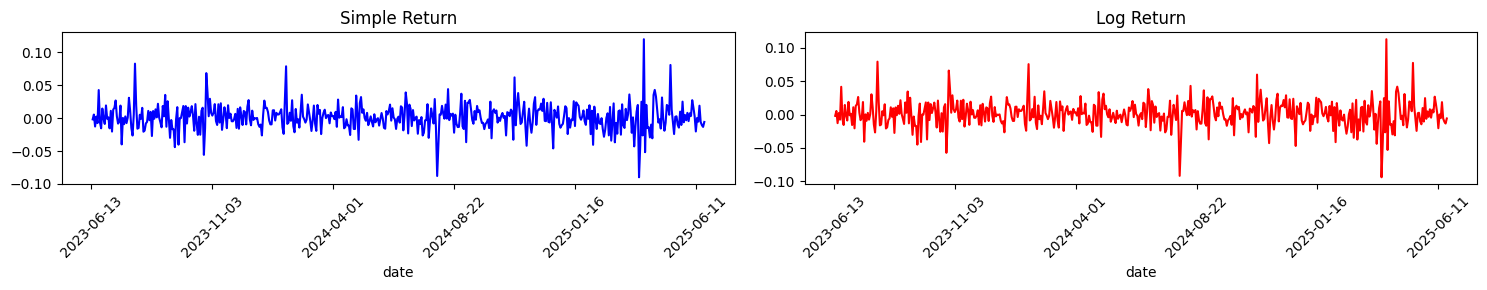

Simple Return: 0.11759 %
Log Return: 0.09828 %


In [213]:
source_path = repo_path + "/data/polygon/daily/amzn/"

amzn_daily = pd.read_parquet(source_path)
amzn_daily.index = pd.to_datetime(amzn_daily.index).strftime('%Y-%m-%d')

amzn_daily['simple_return'] = (amzn_daily['close'] / amzn_daily['close'].shift(1)) - 1

amzn_daily['log_return'] = np.log(amzn_daily['close'] / amzn_daily['close'].shift(1))

fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
amzn_daily['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
amzn_daily['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(amzn_daily['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(amzn_daily['log_return'].mean() * 100, 5)} %")

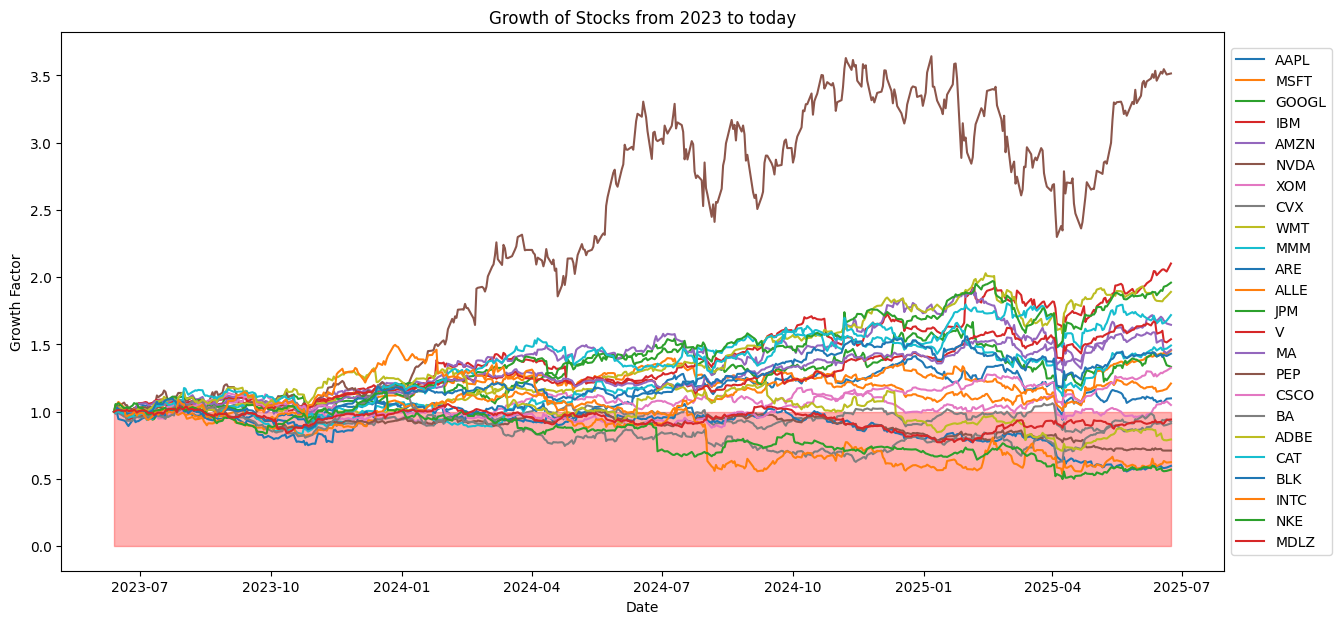

In [214]:
source_daily_path = repo_path + "/data/polygon/daily/"


df = pd.DataFrame()
simple_returns = pd.DataFrame()

plt.figure(figsize=(15, 7))

for ticker in tickers:
    df[ticker] = pd.read_parquet(source_daily_path + ticker.lower() + "/")['close']
    simple_returns[ticker] = (df[ticker] / df[ticker].shift(1)) - 1
    growth = (df[ticker] / df[ticker].iloc[0])
    plt.plot(df.index, growth, label=ticker.upper())

thres = 1.0

plt.fill_between(df.index, thres, 0, where=(df[ticker] > thres), color='red', alpha=0.3)
plt.title('Growth of Stocks from 2023 to today')
plt.xlabel('Date')
plt.ylabel('Growth Factor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

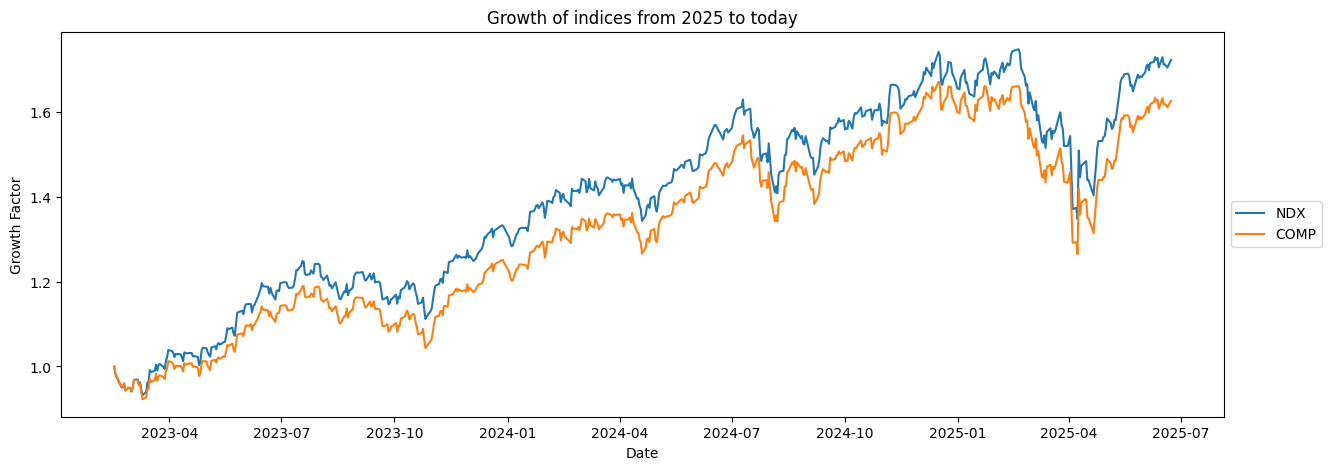

In [215]:
idx_source_daily_path = repo_path + "/data/polygon/daily/index/"

ind_df = pd.DataFrame()
ind_returns = pd.DataFrame()

plt.figure(figsize=(15, 5))

for tick in indices:
    ticker = tick.split(':')[1]  # Extract the ticker symbol from the index
    ind_df[ticker] = pd.read_parquet(idx_source_daily_path + ticker.lower() + "/")['close']
    ind_returns[ticker] = (ind_df[ticker] / ind_df[ticker].shift(1)) - 1
    growth = (ind_df[ticker] / ind_df[ticker].iloc[0])
    plt.plot(ind_df.index, growth, label=ticker.upper())

thres = 1.0

# plt.fill_between(ind_df.index, thres, where=(ind_df[ticker] > thres), color='red', alpha=0.3)
plt.title('Growth of indices from 2025 to today')
plt.xlabel('Date')
plt.ylabel('Growth Factor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

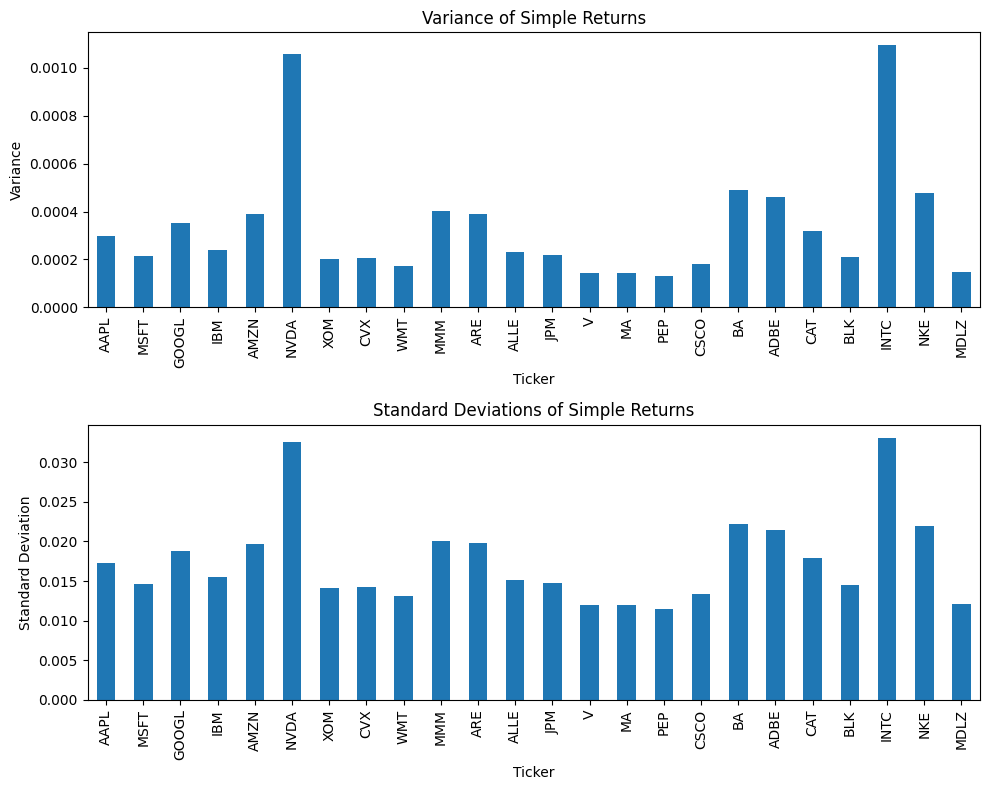

In [216]:
# Create a figure and two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot variance of returns
simple_returns.var().plot(kind='bar', ax=axs[0], title='Variance of Simple Returns')
axs[0].set_xlabel('Ticker')
axs[0].set_ylabel('Variance')

# Plot standard deviation of returns
simple_returns.std().plot(kind='bar', ax=axs[1], title='Standard Deviations of Simple Returns')
axs[1].set_xlabel('Ticker')
axs[1].set_ylabel('Standard Deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: >

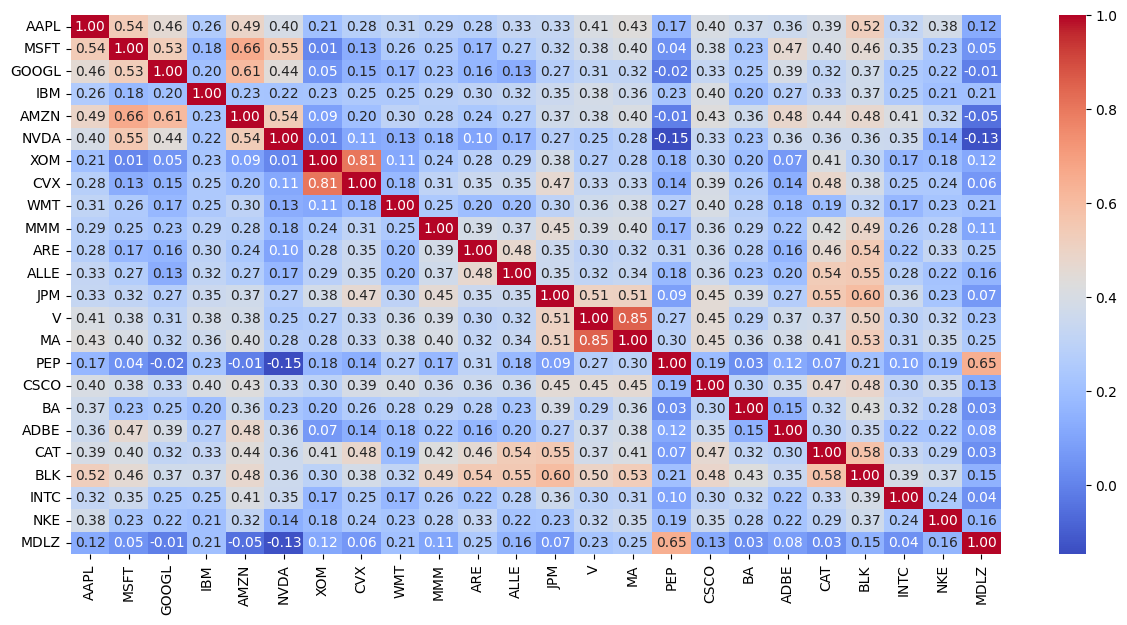

In [217]:
plt.figure(figsize=(15, 7))
sns.heatmap(simple_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

## Comparing the stocks to the index values

<Axes: >

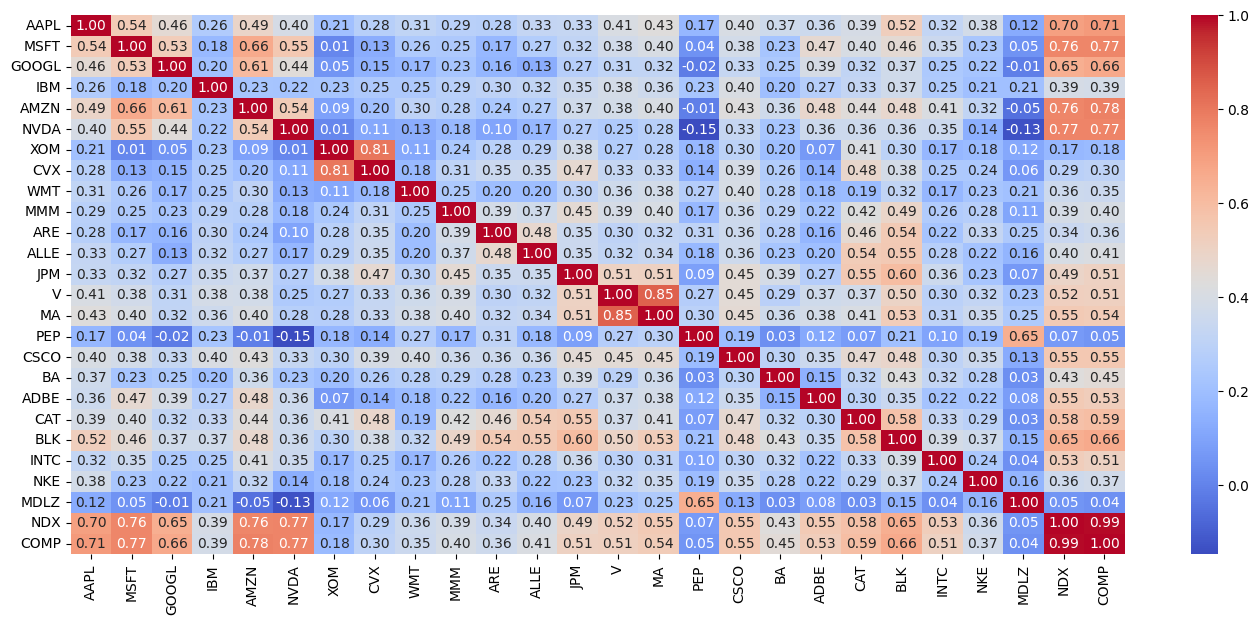

In [218]:
# Make a deep copy of the index returns dataframe and the simple returns dataframe
ind_returns_copy = ind_returns.copy()
simple_returns_copy = simple_returns.copy()

# Change the date format for index to match the stock data
ind_returns_copy.index = pd.to_datetime(ind_returns_copy.index).strftime('%Y-%m-%d')
simple_returns_copy.index = pd.to_datetime(simple_returns_copy.index).strftime('%Y-%m-%d')

# Merge the stock and index dataframes
merged_df = pd.merge(simple_returns_copy,
                     ind_returns_copy,
                     how='inner',
                     left_index=True,
                     right_index=True,
                     suffixes=('', '_idx'))

# Calculate the correlation between each stock and the indices
plt.figure(figsize=(17, 7))
sns.heatmap(merged_df.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

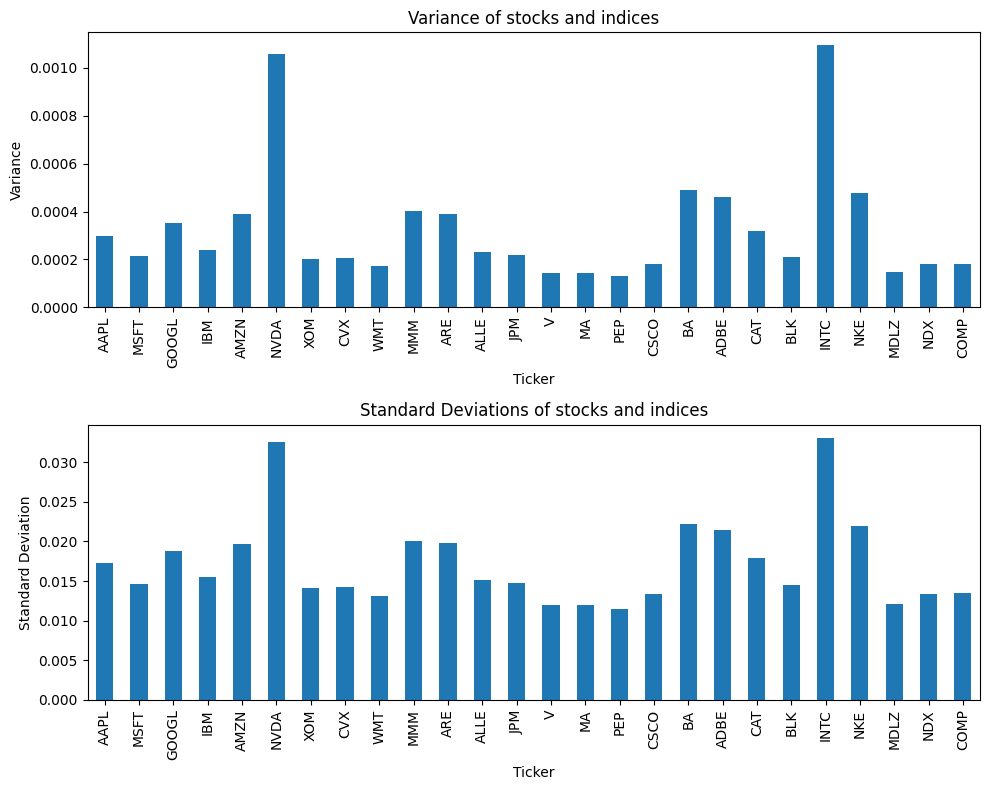

In [219]:
# Create a figure and two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot variance of returns
merged_df.var().plot(kind='bar', ax=axs[0], title='Variance of stocks and indices') 
axs[0].set_xlabel('Ticker')
axs[0].set_ylabel('Variance')

# Plot standard deviation of returns
merged_df.std().plot(kind='bar', ax=axs[1], title='Standard Deviations of stocks and indices')
axs[1].set_xlabel('Ticker')
axs[1].set_ylabel('Standard Deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [220]:
# Setting weight for equal distribution among tickers
equal_ws = np.array([1/len(tickers) for _ in tickers])

In [221]:
pfolio_returns = simple_returns.dot(equal_ws)
pfolio_var = np.dot(equal_ws.T, np.dot(simple_returns.cov(), equal_ws))
print(f"Portfolio Returns: {round(pfolio_returns.mean() * 100, 5)} %")
print(f"Portfolio Variance: {pfolio_var}")

Portfolio Returns: 0.0569 %
Portfolio Variance: 9.980004740378438e-05


## Aggregate DataFrame

### Dividend Yield & Returns in 2024

In [222]:
source_dividends_path = repo_path + "/data/polygon/dividends/"
divs = pd.read_parquet(source_dividends_path)

# Calculate average dividend payout per share per ticker in 2024
sum_divs = divs[(divs.index >= '2024-01-01') & (divs.index < '2025-01-01')][['ticker', 'cash_amount']].groupby('ticker').sum()
sum_divs = sum_divs.rename(columns={'cash_amount': 'total_dividend_2024'})

In [223]:

def get_all_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            full_path = root + '/' + file 
            file_paths.append(full_path.replace('\\', '/').replace('//', '/'))  # Normalize path separators
    return file_paths

all_files = get_all_file_paths(source_daily_path)


In [224]:
idx_2024_df = pd.DataFrame()

# Get the file paths for the indices
all_idx_files = get_all_file_paths(idx_source_daily_path)
idx_2024_files = [f for f in all_idx_files if '2024' in f]

for dir_path in idx_2024_files:
    ticker = dir_path.split('/')[-1].split('_')[0].upper()  # Extract the ticker symbol from the path
    df = pd.read_parquet(dir_path)
    df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
    idx_2024_df[ticker] = df['close']

idx_2024_df['market'] = idx_2024_df.mean(axis=1)  # Calculate the market index as the mean of all indices
idx_2024_df.head()

,COMP,NDX,market
date,,,
2024-01-02,14765.939568,16543.937606,15654.938587
2024-01-03,14592.210616,16368.490570,15480.350593
2024-01-04,14510.300026,16282.012409,15396.156217
2024-01-05,14524.073216,16305.979061,15415.026139
2024-01-08,14843.768303,16649.874274,15746.821288


In [225]:
# Calculate the average share price for each ticker in 2024
avg_price_df = pd.DataFrame()

for file in all_files:
    if '2024' in file:
        ticker = file.split('/')[-1].split('_')[0].upper()
        avg_price_2024 = pd.read_parquet(file)
        avg_price_2024.index = pd.to_datetime(avg_price_2024.index).strftime('%Y-%m-%d')
        avg_price_2024 = avg_price_2024.join(idx_2024_df, how='left', rsuffix='_idx')
        avg_price_df.loc[ticker.upper(), 'avg_price_2024'] = avg_price_2024['close'].mean()
        avg_price_df.loc[ticker.upper(), 'returns_2024_%'] = (avg_price_2024['close'].iloc[-1] / avg_price_2024['close'].iloc[0]) - 1
        avg_price_df.loc[ticker.upper(), 'variance_2024'] = avg_price_2024['close'].var()
        avg_price_df.loc[ticker.upper(), 'covariance_2024'] = avg_price_2024['close'].cov(avg_price_2024['market'])

In [ ]:
# join the dfs on the index
agg_12mnd_df = avg_price_df.join(sum_divs, how='left')

# Calculate the dividend yield for each ticker
agg_12mnd_df['dividend_yield_%_2024'] = (agg_12mnd_df['total_dividend_2024'] / agg_12mnd_df['avg_price_2024']) * 100

,avg_price_2024,returns_2024_%,variance_2024,covariance_2024,total_dividend_2024,dividend_yield_%_2024
ARE,117.724762,-0.245611,48.703627,-6424.757474,5.19,4.408588
CVX,153.067937,-0.031041,43.055122,-186.915177,6.52,4.259547
IBM,193.956389,0.361176,462.164495,21276.812755,6.67,3.438917
XOM,113.476548,0.050899,44.082456,3732.032393,3.84,3.383959
MMM,108.840254,0.403561,426.775907,21741.039519,3.61,3.316788
PEP,169.141111,-0.120583,40.289488,-4117.438603,5.33,3.151215
CSCO,50.803730,0.172045,17.462079,3663.606744,1.59,3.129691
MDLZ,69.468333,-0.191089,15.253796,-3530.908183,1.79,2.576714
BLK,867.082500,0.280907,9350.088189,108587.875547,20.40,2.352717
JPM,205.201111,0.393015,454.576092,26571.484666,4.60,2.241703


## Beta, CAPM  and SHARPE-ratio of the stocks

Disclaimer: In this trial, I will use the two NASDAQ indices `Composite` (COMP) and `NASDAQ-100` (NDX) to represent the market. In the real world I would like to use many other indices like NYSE, Dow Jones, FTSE etc. but as of today I don't have these available.

In [253]:
risk_free_rate = 0.04

agg_12mnd_df['beta_2024'] = agg_12mnd_df['covariance_2024'] / ((agg_12mnd_df.loc['COMP', 'variance_2024'] + agg_12mnd_df.loc['NDX', 'variance_2024']) / 2)
agg_12mnd_df["capm_2024"] = risk_free_rate + agg_12mnd_df['beta_2024'] * (np.mean([agg_12mnd_df.loc['COMP', 'returns_2024_%'], agg_12mnd_df.loc['NDX', 'returns_2024_%']]) - risk_free_rate)
agg_12mnd_df["sharpe_2024"] = (agg_12mnd_df["returns_2024_%"] - risk_free_rate) / np.sqrt(agg_12mnd_df['variance_2024'])

agg_12mnd_df.sort_values('capm_2024', ascending=False).head(10)

,avg_price_2024,returns_2024_%,variance_2024,covariance_2024,total_dividend_2024,dividend_yield_%_2024,beta_2024,capm_2024,sharpe_2024
COMP,17250.766701,0.307793,1.868897e+06,1.851923e+06,NaN,NaN,1.006966,0.290672,0.000196
NDX,19100.499518,0.270083,1.809329e+06,1.822139e+06,NaN,NaN,0.990771,0.286640,0.000171
BLK,867.082500,0.280907,9.350088e+03,1.085879e+05,20.40,2.352717,0.059044,0.054698,0.002491
NVDA,107.825438,1.787951,7.266971e+02,3.448800e+04,0.07,0.064920,0.018753,0.044668,0.064841
MA,474.129286,0.248122,9.351889e+02,3.085418e+04,2.64,0.556810,0.016777,0.044176,0.006806
AAPL,207.205913,0.348955,6.504026e+02,3.080618e+04,0.99,0.477786,0.016751,0.044170,0.012114
CAT,350.250714,0.239315,9.196919e+02,2.936423e+04,5.42,1.547463,0.015967,0.043975,0.006572
JPM,205.201111,0.393015,4.545761e+02,2.657148e+04,4.60,2.241703,0.014448,0.043597,0.016557
MMM,108.840254,0.403561,4.267759e+02,2.174104e+04,3.61,3.316788,0.011821,0.042943,0.017599
IBM,193.956389,0.361176,4.621645e+02,2.127681e+04,6.67,3.438917,0.011569,0.042880,0.014940


## Create a dataset for PBI

In [247]:
def get_all_tickers_with_dirpaths(root_directory):

    all_files = []

    for ticker in os.listdir(root_directory):
        if ticker == 'index':
            idx_dir_path = root_directory + '/index'
            for idx in os.listdir(idx_dir_path):
                ix_dir_path = f"{idx_dir_path}/{idx}"
                all_files.append(('i_' + idx, ix_dir_path))
        else:
            ticker_dir_path = f"{root_directory}/{ticker}"
            all_files.append((ticker, ticker_dir_path))

    return all_files

In [299]:
all_file_paths = get_all_tickers_with_dirpaths(repo_path + '/data/polygon/daily')

combined_df = pd.DataFrame()

for tick, dir_path in all_file_paths:
    tick_df = pd.read_parquet(dir_path)
    combined_df[tick + '_close'] = tick_df['close']
    combined_df[tick + '_1d_rtns'] = (tick_df['close'] / tick_df['close'].shift(1)) - 1
    combined_df[tick + '_rtns_from_2023'] = (tick_df['close']/tick_df['close'].iloc[0]) * 100

combined_df['market_mean_close'] = np.mean([combined_df['i_comp_close'], combined_df['i_ndx_close']])
combined_df['market_1d_rtns'] = (combined_df['market_mean_close'] / combined_df['market_mean_close'].shift(1)) - 1
combined_df['market_rtns_from_2023'] = combined_df['market_mean_close']/combined_df['market_mean_close'].iloc[0] * 100


In [ ]:
# Get the column name of all columns ending with _1yr_returns
stock_return_cols = [col for col in combined_df.columns if col.endswith('_1d_rtns') if not col.startswith('i_')]
stock_close_cols = [col for col in combined_df.columns if col.endswith('_close') if not col.startswith('i_')]
market_return_cols = [col for col in combined_df.columns if col.endswith('_1d_rtns') if col.startswith('i_')]
market_close_cols = [col for col in combined_df.columns if col.endswith('_close') if col.startswith('i_')]
all_return_cols = [col for col in combined_df.columns if col.endswith('_1d_rtns')]
all_close_cols = [col for col in combined_df.columns if col.endswith('_close')]